In [1]:
## Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## To upload file in colab
from google.colab import files
uploaded=files.upload()

Saving Cars24_dataset.csv to Cars24_dataset.csv


In [3]:
##Cars24 is an Indian ecommerce platform founded in 2015 for buying & selling used cars.
## Its headquarter is in Gurugram, Haryana.
##https://www.cars24.com/
df= pd.read_csv('Cars24_dataset.csv')
df.head(4)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Buy
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,N
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,Y
2,2,Honda Jazz V,Honda,Chennai,2011,46000,Petrol,Manual,First,1199,88.70,5,18.20,4.50,Y
3,3,Maruti Ertiga VDI,Maruti,Chennai,2012,87000,Diesel,Manual,First,1248,88.76,7,20.77,6.00,Y


# **Data Cleaning**

In [4]:
## Dataset has taken from Kaggle, so it is clean and in correct format.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Manufacturer       5975 non-null   object 
 3   Location           5975 non-null   object 
 4   Year               5975 non-null   int64  
 5   Kilometers_Driven  5975 non-null   int64  
 6   Fuel_Type          5975 non-null   object 
 7   Transmission       5975 non-null   object 
 8   Owner_Type         5975 non-null   object 
 9   Engine CC          5975 non-null   int64  
 10  Power              5975 non-null   float64
 11  Seats              5975 non-null   int64  
 12  Mileage Km/L       5975 non-null   float64
 13  Price              5975 non-null   float64
 14  Buy                5975 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 700.3+ KB


In [5]:
df.describe()

,Unnamed: 0,Year,Kilometers_Driven,Engine CC,Power,Seats,Mileage Km/L,Price
count,5975.00000,5975.000000,5.975000e+03,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,3008.80887,2013.386778,5.867431e+04,1621.606695,112.599819,5.278828,18.179408,9.501647
std,1739.30056,3.247238,9.155851e+04,601.036987,53.659495,0.808959,4.521801,11.205736
min,0.00000,1998.000000,1.710000e+02,624.000000,34.200000,0.000000,0.000000,0.440000
25%,1502.50000,2012.000000,3.390800e+04,1198.000000,74.000000,5.000000,15.200000,3.500000
50%,3010.00000,2014.000000,5.300000e+04,1493.000000,92.700000,5.000000,18.160000,5.650000
75%,4514.50000,2016.000000,7.300000e+04,1984.000000,138.100000,5.000000,21.100000,9.950000
max,6018.00000,2019.000000,6.500000e+06,5998.000000,560.000000,10.000000,33.540000,160.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'Name', 'Manufacturer', 'Location', 'Year',
       'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price', 'Buy'],
      dtype='object')

In [7]:
df.isna().sum()

Unnamed: 0           0
Name                 0
Manufacturer         0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Engine CC            0
Power                0
Seats                0
Mileage Km/L         0
Price                0
Buy                  0
dtype: int64

# **EDA**

In [8]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [9]:
plt.style.use('ggplot')

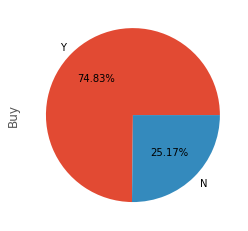

In [10]:
df.Buy.value_counts().plot(kind='pie',autopct='%1.2f%%');

Observation: 
1. Around 75% are ready to buy.
2. It's an imbalance dataset.
3. I build a classification model, to predict whether customers will buy used cars based on their features.

In [11]:
## Target coloum (Buy) is in object. Need to convert that int
df.head(2)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Buy
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,N
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,Y


In [12]:
df.Buy=df.Buy.map({'Y':1,'N':0}).astype('int64')
df.head(2)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Buy
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,First,998,58.16,5,26.60,1.75,0
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,First,1582,126.20,5,19.67,12.50,1


**Converted the target coloum 'Buy' into Yes=1 & NO= 0**

In [13]:
##Customer will prefer to buys the less driven cars.
df.groupby('Buy').Kilometers_Driven.mean()

Buy
0    96367.761968
1    45994.613733
Name: Kilometers_Driven, dtype: float64

In [14]:
##Customer will prefer to buy low power cars.
df.groupby('Buy').Power.mean()

Buy
0    115.546489
1    111.608589
Name: Power, dtype: float64

In [15]:
## Customer is buying 5-seater more
df.groupby('Buy').Seats.mean()

Buy
0    5.384309
1    5.243346
Name: Seats, dtype: float64

In [16]:
## Customer tends to buy less driven, newer model cars with higher price
df.groupby('Buy').Price.mean()

Buy
0     7.196822
1    10.276967
Name: Price, dtype: float64

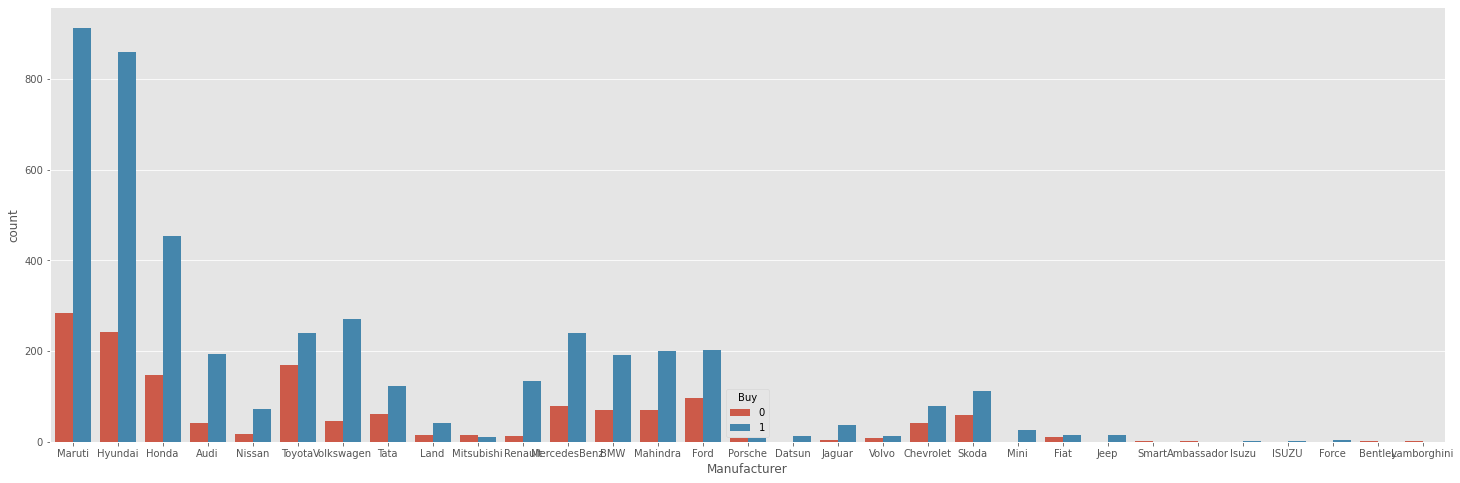

In [17]:
plt.figure(figsize=(25,8))
sns.countplot(x='Manufacturer',hue='Buy',data=df);

Observation: Customer are buying Maruti & Hyundai model more.

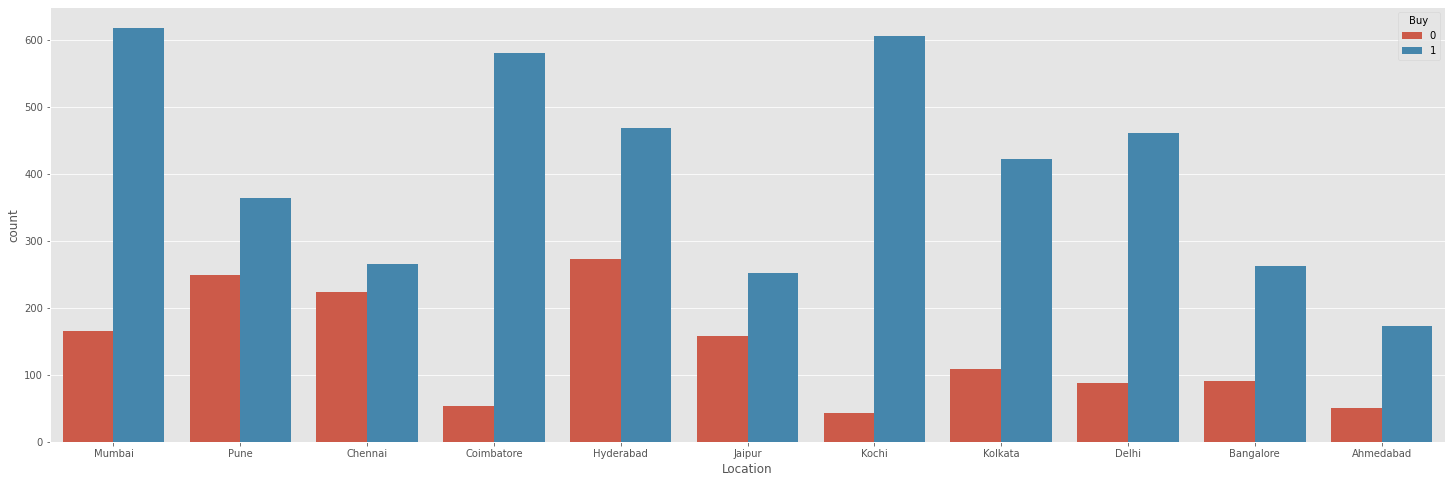

In [18]:
plt.figure(figsize=(25,8))
sns.countplot(x='Location',hue='Buy',data=df);

Observation: Mumbai & Kochi customers are buying more used cars followed by coimbatore.

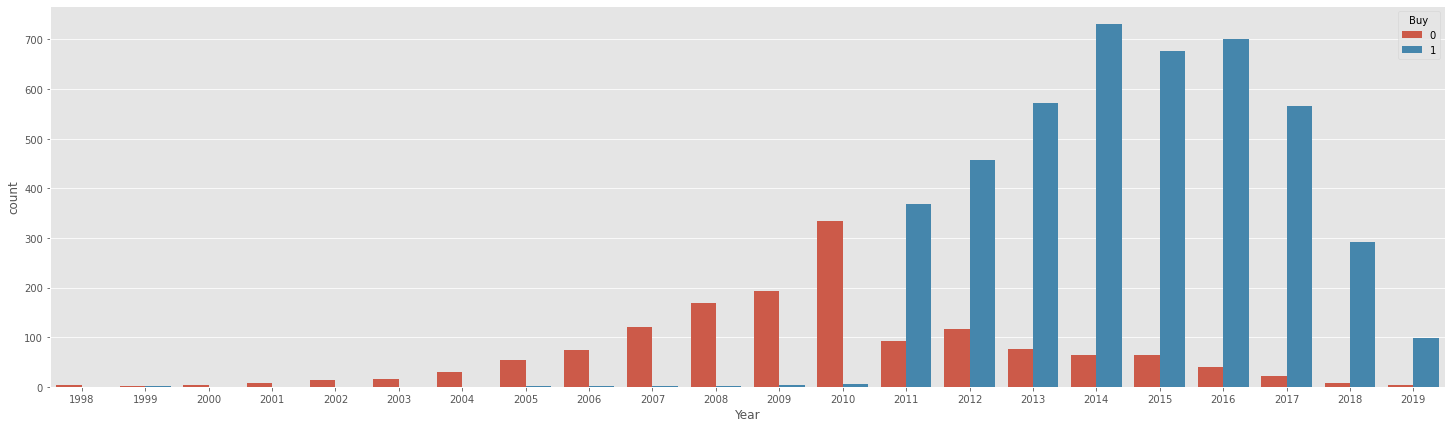

In [19]:
plt.figure(figsize=(25,7))
sns.countplot(x='Year',hue='Buy',data=df);

Observation: Customers are buying newer model rather than older one.

In [20]:
df.Kilometers_Driven.min()

171

In [21]:
df.Kilometers_Driven.max()

6500000

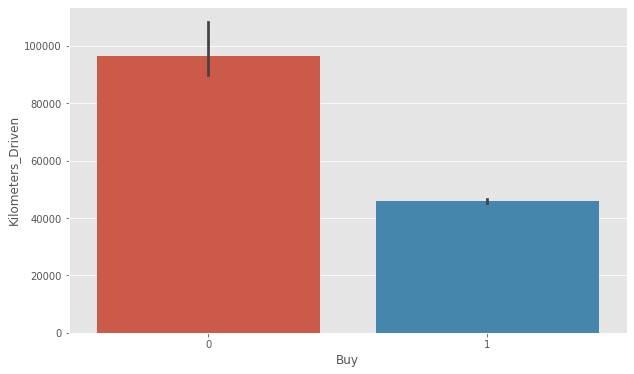

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='Buy',y='Kilometers_Driven',data=df);

Observation: Customers are buying less driven used cars vehicles

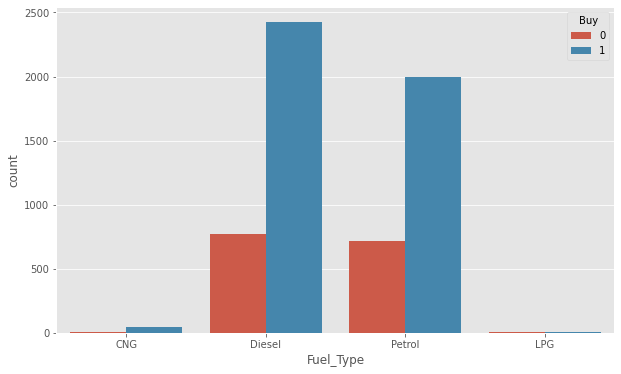

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='Fuel_Type',hue='Buy',data=df);

Observation: Customers are buying more diesel cars followed by petrol

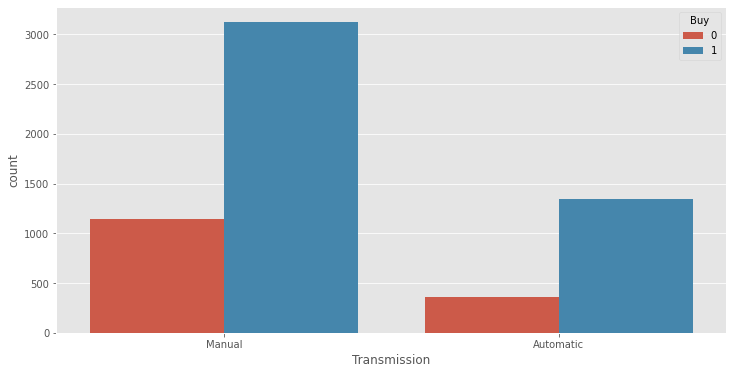

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='Transmission',hue='Buy',data=df);

Observation: Customers are buying more manual used cars than automatic.

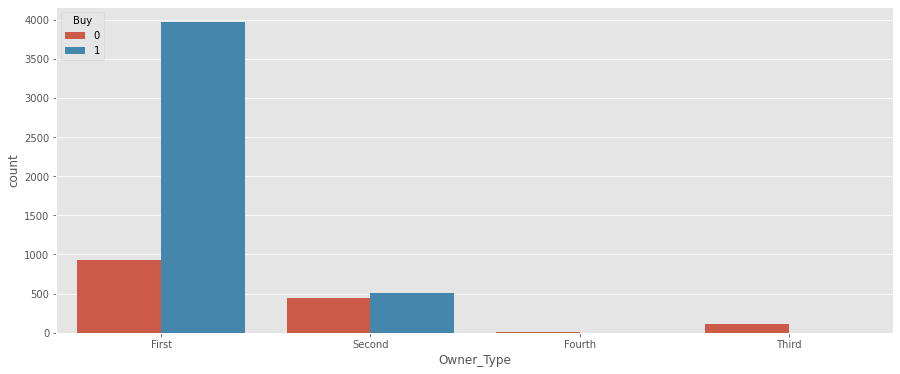

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(x='Owner_Type',hue='Buy',data=df);

Observation: Customers are buying used cars more which has 1 owner.

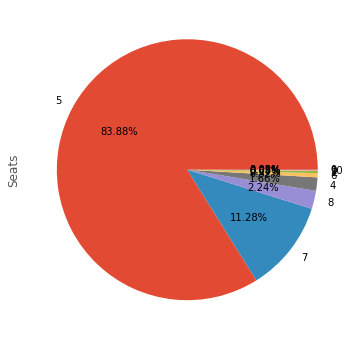

In [26]:
plt.figure(figsize=(15,6))
df.Seats.value_counts().plot(kind='pie',autopct='%1.2f%%');

Observation: 5-seater used cars are more in demands.

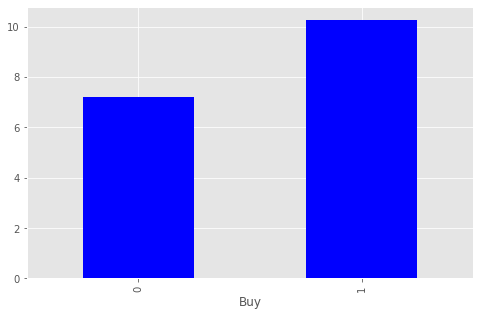

In [27]:
plt.figure(figsize=(8,5))
df.groupby('Buy').Price.mean().plot(kind='bar',color= 'b');

Observation: Customers are buying used cars which has a price range of above 10L.

In [28]:
df.sample(2)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Buy
5718,5761,Audi Q7 3.0 TDI Quattro Premium Plus,Audi,Coimbatore,2015,55662,Diesel,Automatic,First,2967,241.4,7,12.07,42.83,1
5341,5384,Tata Zest Revotron 1.2T XM,Tata,Mumbai,2014,36000,Petrol,Manual,First,1193,88.7,5,17.57,3.70,1


In [29]:
## converting Transmission & Owner Type coloum into int
df['Manual']=df.Transmission.map({'Manual':1,'Automatic':0}).astype('int64')
df.Owner_Type=df.Owner_Type.map({'First':1,'Second':2,'Third':3,'Fourth':4}).astype('int64')
df.head(2)

,Unnamed: 0,Name,Manufacturer,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Buy,Manual
0,0,Maruti Wagon R LXI CNG,Maruti,Mumbai,2010,72000,CNG,Manual,1,998,58.16,5,26.60,1.75,0,1
1,1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Pune,2015,41000,Diesel,Manual,1,1582,126.20,5,19.67,12.50,1,1


In [30]:
## Used one-hot encoding method to convert all catogrical columns into binary.
df=pd.get_dummies(data=df,columns=['Manufacturer'],prefix='Brand')
df=pd.get_dummies(data=df,columns=['Location'],prefix='City')
df=pd.get_dummies(data=df,columns=['Fuel_Type'],prefix='Fuel Type')
df.head(3)

,Unnamed: 0,Name,Year,Kilometers_Driven,Transmission,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,...,City_Hyderabad,City_Jaipur,City_Kochi,City_Kolkata,City_Mumbai,City_Pune,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_LPG,Fuel Type_Petrol
0,0,Maruti Wagon R LXI CNG,2010,72000,Manual,1,998,58.16,5,26.60,...,0,0,0,0,1,0,1,0,0,0
1,1,Hyundai Creta 1.6 CRDi SX Option,2015,41000,Manual,1,1582,126.20,5,19.67,...,0,0,0,0,0,1,0,1,0,0
2,2,Honda Jazz V,2011,46000,Manual,1,1199,88.70,5,18.20,...,0,0,0,0,0,0,0,0,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 59 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          5975 non-null   int64  
 1   Name                5975 non-null   object 
 2   Year                5975 non-null   int64  
 3   Kilometers_Driven   5975 non-null   int64  
 4   Transmission        5975 non-null   object 
 5   Owner_Type          5975 non-null   int64  
 6   Engine CC           5975 non-null   int64  
 7   Power               5975 non-null   float64
 8   Seats               5975 non-null   int64  
 9   Mileage Km/L        5975 non-null   float64
 10  Price               5975 non-null   float64
 11  Buy                 5975 non-null   int64  
 12  Manual              5975 non-null   int64  
 13  Brand_Ambassador    5975 non-null   uint8  
 14  Brand_Audi          5975 non-null   uint8  
 15  Brand_BMW           5975 non-null   uint8  
 16  Brand_

In [32]:
df.columns

Index(['Unnamed: 0', 'Name', 'Year', 'Kilometers_Driven', 'Transmission',
       'Owner_Type', 'Engine CC', 'Power', 'Seats', 'Mileage Km/L', 'Price',
       'Buy', 'Manual', 'Brand_Ambassador', 'Brand_Audi', 'Brand_BMW',
       'Brand_Bentley', 'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Fiat',
       'Brand_Force', 'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai',
       'Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar', 'Brand_Jeep',
       'Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra', 'Brand_Maruti',
       'Brand_MercedesBenz', 'Brand_Mini', 'Brand_Mitsubishi', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Smart',
       'Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo',
       'City_Ahmedabad', 'City_Bangalore', 'City_Chennai', 'City_Coimbatore',
       'City_Delhi', 'City_Hyderabad', 'City_Jaipur', 'City_Kochi',
       'City_Kolkata', 'City_Mumbai', 'City_Pune', 'Fuel Type_CNG',
       'Fuel Type_Diesel', 'Fuel Type_LPG', 'Fuel Type_Pet

In [33]:
## Columns which help in making model is taken into feature columns. Traget column Buy is also exempt from this.
feature_columns=['Year', 'Kilometers_Driven','Owner_Type', 'Engine CC', 'Power',
                 'Seats', 'Mileage Km/L', 'Price','Manual', 'Brand_Ambassador',
                 'Brand_Audi', 'Brand_BMW','Brand_Bentley', 'Brand_Chevrolet',
                 'Brand_Datsun', 'Brand_Fiat','Brand_Force', 'Brand_Ford', 'Brand_Honda',
                 'Brand_Hyundai','Brand_ISUZU', 'Brand_Isuzu', 'Brand_Jaguar',
                 'Brand_Jeep','Brand_Lamborghini', 'Brand_Land', 'Brand_Mahindra',
                 'Brand_Maruti','Brand_MercedesBenz', 'Brand_Mini', 'Brand_Mitsubishi',
                 'Brand_Nissan','Brand_Porsche', 'Brand_Renault', 'Brand_Skoda',
                 'Brand_Smart','Brand_Tata', 'Brand_Toyota', 'Brand_Volkswagen', 
                 'Brand_Volvo','City_Ahmedabad', 'City_Bangalore', 'City_Chennai',
                 'City_Coimbatore','City_Delhi', 'City_Hyderabad', 'City_Jaipur',
                 'City_Kochi','City_Kolkata', 'City_Mumbai', 'City_Pune', 
                 'Fuel Type_CNG','Fuel Type_Diesel', 'Fuel Type_LPG', 'Fuel Type_Petrol']

In [34]:
X=df[feature_columns]
y=df.Buy

In [35]:
X.head(2)

,Year,Kilometers_Driven,Owner_Type,Engine CC,Power,Seats,Mileage Km/L,Price,Manual,Brand_Ambassador,...,City_Hyderabad,City_Jaipur,City_Kochi,City_Kolkata,City_Mumbai,City_Pune,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_LPG,Fuel Type_Petrol
0,2010,72000,1,998,58.16,5,26.60,1.75,1,0,...,0,0,0,0,1,0,1,0,0,0
1,2015,41000,1,1582,126.20,5,19.67,12.50,1,0,...,0,0,0,0,0,1,0,1,0,0


# **Building ML model**

In [36]:
from sklearn.model_selection import train_test_split 

In [37]:
## Using stratify to divide the train & test beacuse dataset is imbalance.
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30,random_state=13,stratify=y)

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler= MinMaxScaler()

In [40]:
## To transform the data into 0 & 1
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

### KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn= KNeighborsClassifier(n_neighbors=5)

In [43]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [44]:
knn.predict_proba(X_test)

array([[0.8, 0.2],
       [0.4, 0.6],
       [0. , 1. ],
       ...,
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ]])

In [45]:
knn.score(X_train,y_train)

0.8926351028216164

In [46]:
knn.score(X_test,y_test)

0.8371444506413832

Text(0, 0.5, 'Accuracy Score')

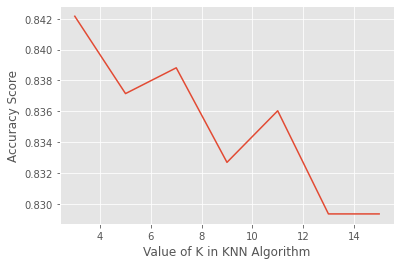

In [47]:
# Performing Hyperparameter Tuning Manually
accuracy = []
neighbours=[3,5,7,9,11,13,15]
for n in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n)
    acc = knn.fit(X_train,y_train).score(X_test,y_test)
    accuracy.append(acc)
plt.plot(neighbours,accuracy)
plt.xlabel('Value of K in KNN Algorithm')
plt.ylabel('Accuracy Score')

Observation: Performing Hyperparameter tuning at KNN is reducing the accuracy score.

# **Auto ML**

In [53]:
! git clone http://github.com/shankarpandala/lazypredict.git

Cloning into 'lazypredict'...
remote: Enumerating objects: 777, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 777 (delta 106), reused 112 (delta 96), pack-reused 645
Receiving objects: 100% (777/777), 166.42 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (426/426), done.


In [54]:
cd lazypredict

/content/lazypredict


In [55]:
! python setup.py install   

running install
running bdist_egg
running egg_info
creating lazypredict.egg-info
writing lazypredict.egg-info/PKG-INFO
writing dependency_links to lazypredict.egg-info/dependency_links.txt
writing entry points to lazypredict.egg-info/entry_points.txt
writing requirements to lazypredict.egg-info/requires.txt
writing top-level names to lazypredict.egg-info/top_level.txt
writing manifest file 'lazypredict.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
adding license file 'LICENSE'
adding license file 'AUTHORS.rst'
writing manifest file 'lazypredict.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/lazypredict
copying lazypredict/Supervised.py -> build/lib/lazypredict
copying lazypredict/__init__.py -> build/lib/lazypredict
copying lazypredict/cli.py -> build/lib/lazypredict
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating buil

In [56]:
import lazypredict

In [57]:
from lazypredict.Supervised import LazyClassifier

In [58]:
auto= LazyClassifier(random_state=13,ignore_warnings=True)

In [59]:
models= auto.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:15<00:00,  1.83it/s]


In [60]:
##AutoML predict that XDBoost & Bagging Classifier is giving 100% accuracy
models[0]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,1.00,1.00,0.22
XGBClassifier,1.00,1.00,1.00,1.00,0.67
RandomForestClassifier,0.99,0.99,0.99,0.99,0.50
LGBMClassifier,0.99,0.99,0.99,0.99,0.29
DecisionTreeClassifier,0.99,0.98,0.98,0.99,0.10
AdaBoostClassifier,0.97,0.95,0.95,0.97,0.66
ExtraTreesClassifier,0.94,0.89,0.89,0.94,1.66
LogisticRegression,0.92,0.88,0.88,0.92,0.13
CalibratedClassifierCV,0.92,0.88,0.88,0.92,3.53


### Random Forest Classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf= RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=13)

In [63]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=1000, random_state=13)

In [64]:
rf.score(X_train,y_train)

0.989478718316595

In [65]:
rf.score(X_test,y_test)

0.9905186837702176

### Bagging Classifier

In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
cls_bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),n_estimators=1000,random_state=13)

In [69]:
cls_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                  n_estimators=1000, random_state=13)

In [70]:
cls_bag.score(X_train,y_train)

0.990674318507891

In [71]:
cls_bag.score(X_test,y_test)

0.9921918572225321

Observation: Bagging model Decision Tree is giving 99% score.

### XDBoost Classifier

In [72]:
from xgboost import XGBClassifier

In [73]:
xgb= XGBClassifier(max_depth=3,random_state=13)

In [74]:
xgb.fit(X_train,y_train)

XGBClassifier(random_state=13)

In [75]:
xgb.score(X_train,y_train)

0.994261119081779

In [76]:

xgb.score(X_test,y_test)

0.9955382041271612

Observation; XGBoost is also giving 99% score.

In [77]:
print("Score of KNN:",knn.fit(X_train,y_train).score(X_train,y_train))
print("Score of Random Forest:",rf.fit(X_train,y_train).score(X_train,y_train))
print("Score of Bagging Classifier:",cls_bag.fit(X_train,y_train).score(X_train,y_train))
print("Score of XGBclassifier:",xgb.fit(X_train,y_train).score(X_train,y_train))


Score of KNN: 0.8605930176948828
Score of Random Forest: 0.989478718316595
Score of Bagging Classifier: 0.990674318507891
Score of XGBclassifier: 0.994261119081779


**It's an imbalance dataset, so accuracy score is not a good matrix.**

In [78]:
print("Score of KNN:",knn.fit(X_test,y_test).score(X_test,y_test))
print("Score of Random Forest:",rf.fit(X_test,y_test).score(X_test,y_test))
print("Score of Bagging Classifier:",cls_bag.fit(X_test,y_test).score(X_test,y_test))
print("Score of XGBclassifier:",xgb.fit(X_test,y_test).score(X_test,y_test))


Score of KNN: 0.826547685443391
Score of Random Forest: 0.992749581706637
Score of Bagging Classifier: 0.9933073061907418
Score of XGBclassifier: 0.9977691020635806


# **Evaluating the model**

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, plot_roc_curve, ConfusionMatrixDisplay

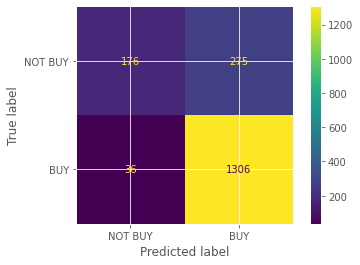

In [80]:
ConfusionMatrixDisplay.from_estimator(knn,X_test,y_test,display_labels=['NOT BUY','BUY']);

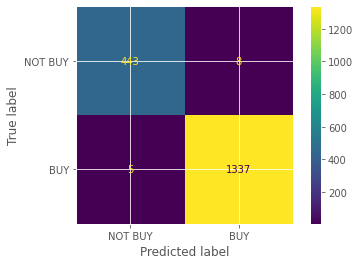

In [81]:
ConfusionMatrixDisplay.from_estimator(rf,X_test,y_test,display_labels=['NOT BUY','BUY']);

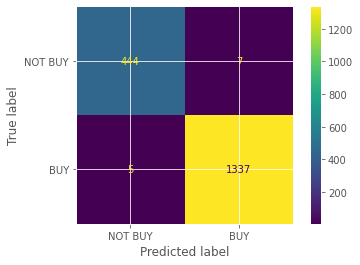

In [82]:
ConfusionMatrixDisplay.from_estimator(cls_bag,X_test,y_test,display_labels=['NOT BUY','BUY']);

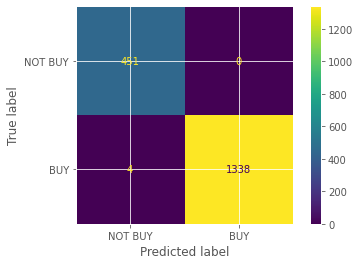

In [83]:
ConfusionMatrixDisplay.from_estimator(xgb,X_test,y_test,display_labels=['NOT BUY','BUY']);

In [84]:
print(classification_report(y_test,knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.39      0.53       451
           1       0.83      0.97      0.89      1342

    accuracy                           0.83      1793
   macro avg       0.83      0.68      0.71      1793
weighted avg       0.83      0.83      0.80      1793



In [85]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       451
           1       0.99      1.00      1.00      1342

    accuracy                           0.99      1793
   macro avg       0.99      0.99      0.99      1793
weighted avg       0.99      0.99      0.99      1793



In [86]:
print(classification_report(y_test,cls_bag.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       451
           1       0.99      1.00      1.00      1342

    accuracy                           0.99      1793
   macro avg       0.99      0.99      0.99      1793
weighted avg       0.99      0.99      0.99      1793



In [87]:
print(classification_report(y_test,xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       451
           1       1.00      1.00      1.00      1342

    accuracy                           1.00      1793
   macro avg       1.00      1.00      1.00      1793
weighted avg       1.00      1.00      1.00      1793



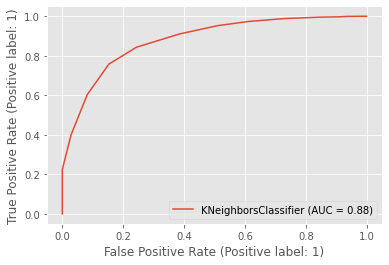

In [88]:
plot_roc_curve(knn,X_test,y_test);

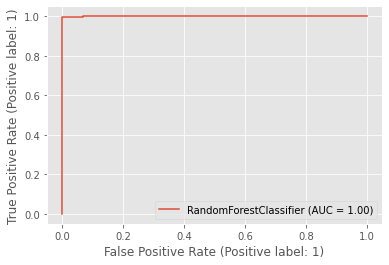

In [89]:
plot_roc_curve(rf,X_test,y_test);

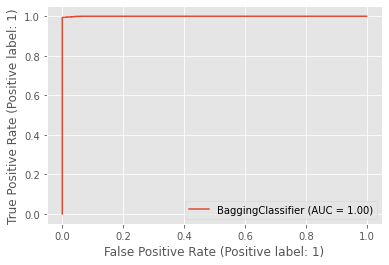

In [90]:
plot_roc_curve(cls_bag,X_test,y_test);

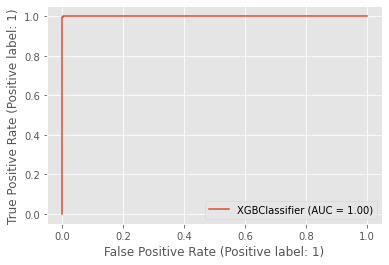

In [91]:
plot_roc_curve(xgb,X_test,y_test);